# Regression
Website: https://youtu.be/4PXAztQtoTg?t=11565

In [3]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

In [7]:
x = np.linspace(-3, 3, 100)
rng = np.random.RandomState(42)
y = np.sin( 4 * x) + x + rng.uniform(size = len(x))

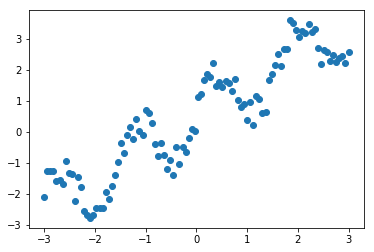

In [10]:
plt.plot(x, y, 'o');

## Linear Regression 

In [12]:
print('Before: ', x.shape)
X = x[:, np.newaxis]
print('After: ', X.shape)

Before:  (100,)
After:  (100, 1)


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
#Don't need stratify for continuous variables

In [18]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Intercept and coefficients

In [19]:
print('Weight coefficients: ', regressor.coef_)
print('y-axis intercept: ', regressor.intercept_)

Weight coefficients:  [0.90211711]
y-axis intercept:  0.44840974988268


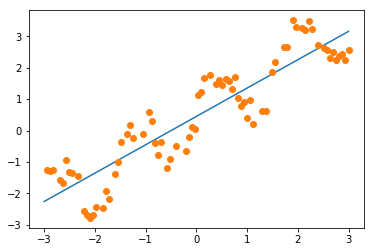

In [22]:
min_pt = X.min() * regressor.coef_[0] + regressor.intercept_
max_pt = X.max() * regressor.coef_[0] + regressor.intercept_

plt.plot([X.min(), X.max()], [min_pt, max_pt]) # regression line 
plt.plot(X_train, y_train, 'o'); # data points 

### Predictions 

In [23]:
y_pred_train = regressor.predict(X_train)

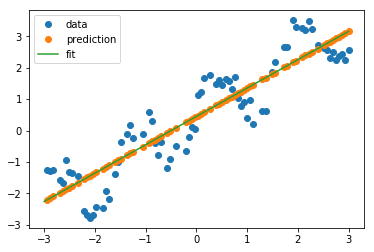

In [27]:
plt.plot(X_train, y_train, 'o', label = 'data')
plt.plot(X_train, y_pred_train, 'o', label = 'prediction')
plt.plot([X.min(), X.max()], [min_pt, max_pt], label = 'fit')
plt.legend(loc = 'best');

#prediction are on the data points of the regression line

### Prediction Metrics

In [30]:
regressor.score(X_test, y_test) #R2 score 

y_pred_test = regressor.predict(X_test)

from sklearn.metrics import mean_squared_error #mean square error
mean_squared_error(y_test, y_pred_test)

0.7056695020009782

## Adding Nonlinear Features to Linear Regression

In [ ]:
# add a nonlinear feature containing Sin(4x) to X and redo the fit 

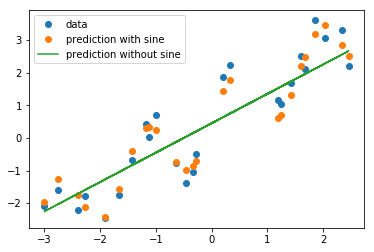

In [35]:
XX_train = np.concatenate((X_train, np.sin(4 * X_train)), axis = 1)
XX_test = np.concatenate((X_test, np.sin(4 * X_test)), axis = 1)
regressor.fit(XX_train, y_train)
y_pred_test_sine = regressor.predict(XX_test)

plt.plot(X_test, y_test, 'o', label = 'data')
plt.plot(X_test, y_pred_test_sine, 'o', label = 'prediction with sine')
plt.plot(X_test, y_pred_test, label = 'prediction without sine')
plt.legend(loc = 'best');

#The orange points follow the sine curvature better than the blue points

## K Neighbors Regression 

W/ one Neighbor - overfitting 

In [53]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors = 1)
knn_reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=1, p=2,
          weights='uniform')

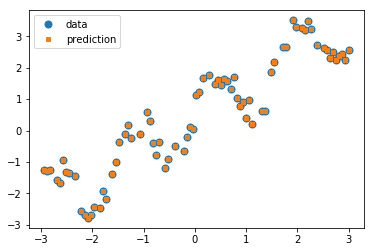

In [54]:
y_pred_train = knn_reg.predict(X_train)
plt.plot(X_train, y_train, 'o', label = 'data', markersize = 7)
plt.plot(X_train, y_pred_train, 's', label = 'prediction', markersize = 4)
plt.legend(loc = 'best')

In [55]:
print(knn_reg.score(X_test, y_test))
print(knn_reg.score(X_train, y_train))

0.9166293022467948
1.0


In [49]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors = 10)
knn_reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=10, p=2,
          weights='uniform')

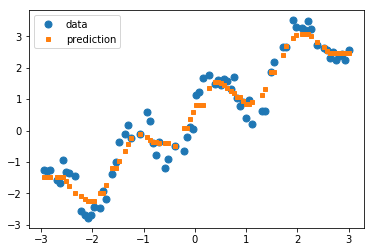

In [50]:
y_pred_train = knn_reg.predict(X_train)
plt.plot(X_train, y_train, 'o', label = 'data', markersize = 7)
plt.plot(X_train, y_pred_train, 's', label = 'prediction', markersize = 4)
plt.legend(loc = 'best')

In [52]:
print(knn_reg.score(X_test, y_test))
print(knn_reg.score(X_train, y_train))

0.9275059643132191
0.9549962833591996


## Boston Data 

In [57]:
from sklearn.datasets import load_boston 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

#Lin Reg vs KNN ( k = 1)
boston = load_boston()
X = boston.data
y = boston.target

print('X.shape: ', X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size = 0.25, 
                                                   random_state = 42)

linreg = LinearRegression()
knnreg = KNeighborsRegressor(n_neighbors = 1)

linreg.fit(X_train, y_train)
print('Linear Regression Train/Test: %.3f/%.3f' % (linreg.score(X_train, y_train), linreg.score(X_test, y_test)))

knnreg.fit(X_train, y_train)
print('Linear Regression Train/Test: %.3f/%.3f' % (knnreg.score(X_train, y_train), knnreg.score(X_test, y_test)))


X.shape:  (506, 13)
Linear Regression Train/Test: 0.748/0.684
Linear Regression Train/Test: 1.000/0.481


In [59]:
#Lin Reg vs KNN ( k = 8)
boston = load_boston()
X = boston.data
y = boston.target

print('X.shape: ', X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size = 0.25, 
                                                   random_state = 42)

linreg = LinearRegression()
knnreg = KNeighborsRegressor(n_neighbors = 8)

linreg.fit(X_train, y_train)
print('Linear Regression Train/Test: %.3f/%.3f' % (linreg.score(X_train, y_train), linreg.score(X_test, y_test)))

knnreg.fit(X_train, y_train)
print('Linear Regression Train/Test: %.3f/%.3f' % (knnreg.score(X_train, y_train), knnreg.score(X_test, y_test)))

X.shape:  (506, 13)
Linear Regression Train/Test: 0.748/0.684
Linear Regression Train/Test: 0.607/0.553


KNN doesn't work well on this data set works well since we didn't scale the data, for my own curiosity I wanna see what happens when we scale the data 

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [62]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [63]:
#fitting the model with the scaled data
linreg = LinearRegression()
knnreg = KNeighborsRegressor(n_neighbors = 8)

linreg.fit(X_train_scaled, y_train)
print('Linear Regression Train/Test: %.3f/%.3f' % (linreg.score(X_train_scaled, y_train), linreg.score(X_test_scaled, y_test)))

knnreg.fit(X_train_scaled, y_train)
print('Linear Regression Train/Test: %.3f/%.3f' % (knnreg.score(X_train_scaled, y_train), knnreg.score(X_test_scaled, y_test)))

Linear Regression Train/Test: 0.748/0.684
Linear Regression Train/Test: 0.787/0.677


KNN definitely improved!